# 해밀턴 사이클 문제 시각화

이 노트북은 해밀턴 사이클 문제의 백트래킹 해결 과정을 시각적으로 보여줍니다.

## 필요한 라이브러리 임포트

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import platform
from IPython.display import clear_output
import time

def set_korean_font():
    """한글 폰트 설정"""
    system = platform.system()
    if system == "Darwin":  # macOS
        plt.rc('font', family='AppleGothic')
    elif system == "Windows":  # Windows
        plt.rc('font', family='Malgun Gothic')
    elif system == "Linux":  # Linux
        plt.rc('font', family='NanumGothic')
    plt.rc('axes', unicode_minus=False)

# 한글 폰트 설정
set_korean_font()

## 그래프 시각화 함수 정의

In [3]:
def visualize_graph(G, path=None, pos=None, title="Graph", clear=True):
    """그래프와 현재 경로 시각화"""
    if clear:
        clear_output(wait=True)
    plt.figure(figsize=(10, 8))
    
    if pos is None:
        pos = nx.spring_layout(G)
    
    # 기본 그래프 그리기
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', 
                          node_size=500)
    nx.draw_networkx_edges(G, pos, edge_color='gray')
    nx.draw_networkx_labels(G, pos)
    
    # 현재 경로 강조
    if path and len(path) > 1:
        path_edges = list(zip(path[:-1], path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges,
                             edge_color='r', width=2)
        
        # 현재 경로의 노드 강조
        nx.draw_networkx_nodes(G, pos, nodelist=path,
                             node_color='lightgreen',
                             node_size=500)
        
        # 현재 노드 특별 강조
        if path:
            nx.draw_networkx_nodes(G, pos, 
                                  nodelist=[path[-1]],
                                  node_color='yellow',
                                  node_size=500)
    
    plt.title(title)
    plt.axis('off')
    plt.show()
    time.sleep(0.5)  # 시각화 지연

## 해밀턴 사이클 찾기 알고리즘

In [4]:
def is_valid_next(v, pos, path, graph):
    """다음 정점이 유효한지 확인"""
    if v in path:
        return False
    current = path[pos-1]
    return graph.has_edge(current, v)

def hamiltonian_cycle_util(graph, path, pos, n, start_vertex, pos_layout):
    """해밀턴 사이클 찾기 (백트래킹)"""
    if pos == n:
        if graph.has_edge(path[pos-1], start_vertex):
            path.append(start_vertex)
            visualize_graph(graph, path, pos_layout, 
                          "해밀턴 사이클 발견!")
            return True
        return False
    
    for v in graph.nodes():
        if is_valid_next(v, pos, path, graph):
            path.append(v)
            visualize_graph(graph, path, pos_layout,
                          f"정점 {v} 시도 중")
            
            if hamiltonian_cycle_util(graph, path, pos+1, n,
                                    start_vertex, pos_layout):
                return True
            
            path.pop()
            visualize_graph(graph, path, pos_layout,
                          f"정점 {v}에서 백트래킹")
    
    return False

def find_hamiltonian_cycle(graph, start_vertex=0):
    """해밀턴 사이클 찾기 메인 함수"""
    n = graph.number_of_nodes()
    path = [start_vertex]
    
    pos_layout = nx.spring_layout(graph)
    visualize_graph(graph, path, pos_layout, "초기 그래프")
    
    if hamiltonian_cycle_util(graph, path, 1, n, start_vertex, pos_layout):
        print("\n해밀턴 사이클 발견:")
        print(" -> ".join(map(str, path)))
        return path
    
    print("\n해밀턴 사이클이 존재하지 않습니다.")
    return None

## 샘플 그래프 생성 및 실행

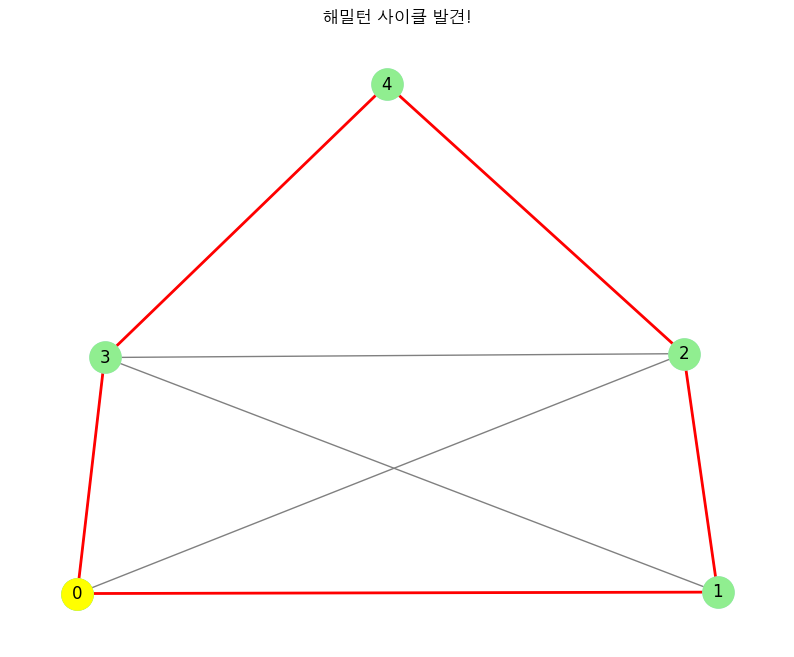


해밀턴 사이클 발견:
0 -> 1 -> 2 -> 4 -> 3 -> 0


In [5]:
# 샘플 그래프 생성
G = nx.Graph()
edges = [
    (0, 1), (0, 2), (0, 3),
    (1, 2), (1, 3),
    (2, 3), (2, 4),
    (3, 4)
]
G.add_edges_from(edges)

print("해밀턴 사이클 찾기 시작...")
cycle = find_hamiltonian_cycle(G)